In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Epl.csv')
X = dataset['Squad Value']
y = dataset['Points']

In [3]:
dataset.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8


In [4]:
dataset.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2013.000000,36.304545,24.793636,22.886364,225.792909,0.000000,52.245455,10.500000
std,3.169489,5.410372,1.136427,5.377171,183.079602,27.061405,17.569788,5.779431
min,2008.000000,21.000000,21.300000,8.000000,22.500000,-54.000000,16.000000,1.000000
25%,2010.000000,33.000000,23.975000,19.000000,99.662500,-20.000000,40.000000,5.750000
50%,2013.000000,36.000000,24.800000,22.000000,158.275000,-7.000000,47.000000,10.500000
75%,2016.000000,40.000000,25.500000,26.000000,299.782500,20.250000,64.250000,15.250000
max,2018.000000,54.000000,28.100000,41.000000,1000.100000,79.000000,100.000000,20.000000


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [6]:
X_train.shape


(146,)

In [7]:
import numpy as np

# Assuming X_train and y_train are pandas Series
X_train = X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
X_test.shape

(74,)

In [10]:
X_test=X_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [11]:
y_pred = regressor.predict(X_test)
y_pred.shape


(74, 1)

In [12]:
regressor.coef_

array([[0.07408734]])

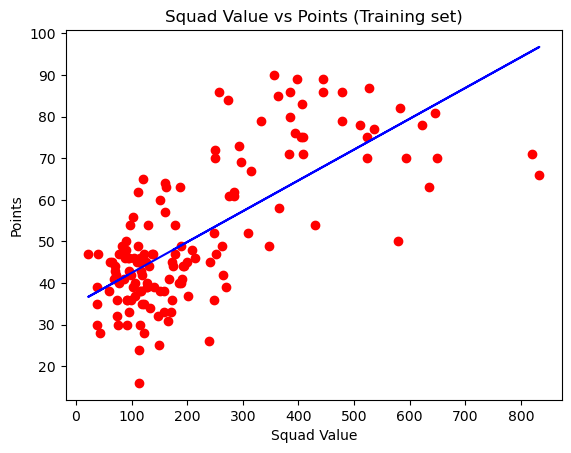

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Squad Value vs Points (Training set)')
plt.xlabel('Squad Value')
plt.ylabel('Points')
plt.show()

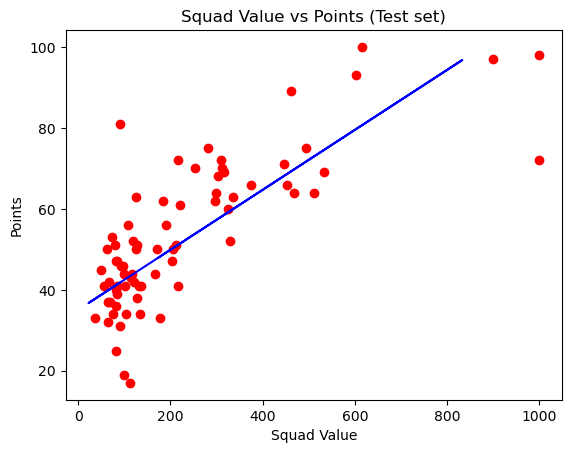

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Squad Value vs Points (Test set)')
plt.xlabel('Squad Value')
plt.ylabel('Points')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [16]:
print(mse)
print(mae)
print(rmse)

133.1305055642667
8.54546699584759
11.538219341140413


In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.5881153509724897


# here r2 score is nearly 59% not so efficient
switching regression

# Polynomial Regression 

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 40.91  51.  ]
 [ 39.7   31.  ]
 [ 40.41  52.  ]
 [ 73.72  93.  ]
 [ 77.79  69.  ]
 [ 72.92  66.  ]
 [ 65.98  69.  ]
 [ 40.54  42.  ]
 [ 39.97  34.  ]
 [ 39.96  56.  ]
 [ 46.78  62.  ]
 [ 49.74  50.  ]
 [ 40.22  43.  ]
 [ 51.03  41.  ]
 [ 85.48  97.  ]
 [ 45.84  33.  ]
 [146.07  72.  ]
 [ 39.81  36.  ]
 [ 51.3   72.  ]
 [ 39.8   25.  ]
 [ 39.7   46.  ]
 [ 39.75  41.  ]
 [ 39.85  34.  ]
 [ 65.49  70.  ]
 [ 40.6   50.  ]
 [ 40.9   38.  ]
 [ 78.4   64.  ]
 [ 78.35  89.  ]
 [ 41.2   41.  ]
 [ 41.78  45.  ]
 [ 39.8   40.  ]
 [ 40.08  53.  ]
 [ 43.37  33.  ]
 [ 41.46  34.  ]
 [ 63.48  64.  ]
 [ 40.33  42.  ]
 [ 39.78  44.  ]
 [ 67.19  60.  ]
 [ 40.54  37.  ]
 [ 40.12  17.  ]
 [ 47.44  56.  ]
 [ 39.74  39.  ]
 [ 40.76  63.  ]
 [ 39.7   81.  ]
 [ 40.29  44.  ]
 [ 41.62  41.  ]
 [ 78.62  75.  ]
 [ 67.72  52.  ]
 [ 40.57  32.  ]
 [ 56.79  70.  ]
 [146.07  98.  ]
 [ 49.36  47.  ]
 [ 68.69  63.  ]
 [ 72.73 100.  ]
 [ 63.16  62.  ]
 [ 44.58  44.  ]
 [ 50.58  51.  ]
 [ 44.95  50.  ]
 [ 39.79  41. 

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [21]:
print(mse)
print(mae)
print(rmse)

227.43729241510147
9.868957059342337
15.081024249536284


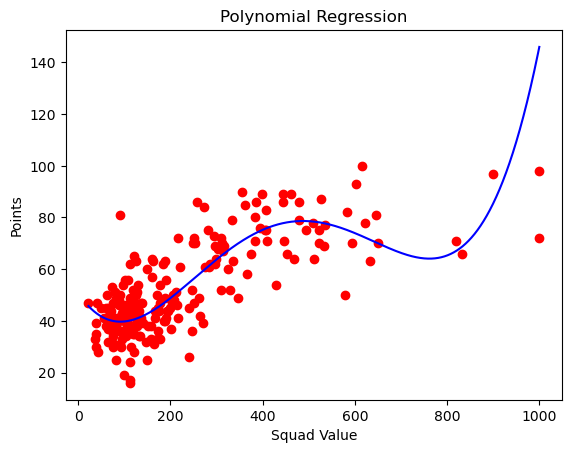

In [22]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Squad Value')
plt.ylabel('Points')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2963451241688576

Since R2 score is 29% ie not prefrerrable polynomial regression

# Using SVR

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\raj37\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 40.73  51.  ]
 [ 41.42  31.  ]
 [ 40.78  52.  ]
 [ 71.98  93.  ]
 [ 75.96  69.  ]
 [ 77.15  66.  ]
 [ 67.1   69.  ]
 [ 40.76  42.  ]
 [ 41.97  34.  ]
 [ 40.95  56.  ]
 [ 43.1   62.  ]
 [ 45.49  50.  ]
 [ 40.83  43.  ]
 [ 46.73  41.  ]
 [ 64.97  97.  ]
 [ 42.48  33.  ]
 [ 62.51  72.  ]
 [ 41.75  36.  ]
 [ 46.99  72.  ]
 [ 41.73  25.  ]
 [ 41.33  46.  ]
 [ 41.63  41.  ]
 [ 41.04  34.  ]
 [ 66.34  70.  ]
 [ 42.53  50.  ]
 [ 40.73  38.  ]
 [ 77.53  64.  ]
 [ 80.45  89.  ]
 [ 40.73  41.  ]
 [ 43.22  45.  ]
 [ 41.74  40.  ]
 [ 42.09  53.  ]
 [ 43.93  33.  ]
 [ 40.75  34.  ]
 [ 63.23  64.  ]
 [ 42.32  42.  ]
 [ 41.12  44.  ]
 [ 68.97  60.  ]
 [ 42.49  37.  ]
 [ 40.86  17.  ]
 [ 43.57  56.  ]
 [ 41.6   39.  ]
 [ 40.73  63.  ]
 [ 41.4   81.  ]
 [ 40.81  44.  ]
 [ 40.78  41.  ]
 [ 78.69  75.  ]
 [ 69.77  52.  ]
 [ 42.5   32.  ]
 [ 53.51  70.  ]
 [ 62.51  98.  ]
 [ 45.14  47.  ]
 [ 71.24  63.  ]
 [ 71.58 100.  ]
 [ 62.73  62.  ]
 [ 41.78  44.  ]
 [ 46.28  51.  ]
 [ 41.97  50.  ]
 [ 41.11  41. 

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [28]:
print(mse)
print(mae)
print(rmse)

164.77261099606923
9.610519544156869
12.83637842212784


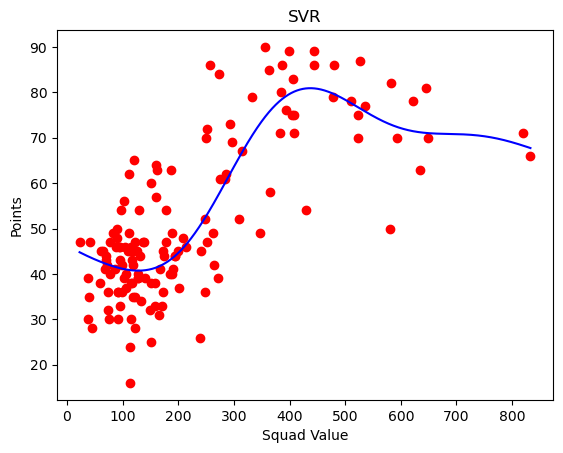

In [29]:
X_grid = np.arange(min(sc_X.inverse_transform(X_train)), max(sc_X.inverse_transform(X_train)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Squad Value')
plt.ylabel('Points')
plt.show()

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4902197001219937

Since SVR gives 46.6% R2 score moving to Random forest

# Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

C:\Users\raj37\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [32]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  0.95  51.  ]
 [  0.95  31.  ]
 [  0.95  52.  ]
 [  0.95  93.  ]
 [  0.95  69.  ]
 [  0.95  66.  ]
 [  0.95  69.  ]
 [  0.95  42.  ]
 [  0.95  34.  ]
 [  0.95  56.  ]
 [  0.95  62.  ]
 [  0.95  50.  ]
 [  0.95  43.  ]
 [  0.95  41.  ]
 [  0.95  97.  ]
 [  0.95  33.  ]
 [  0.95  72.  ]
 [  0.95  36.  ]
 [  0.95  72.  ]
 [  0.95  25.  ]
 [  0.95  46.  ]
 [  0.95  41.  ]
 [  0.95  34.  ]
 [  0.95  70.  ]
 [  0.95  50.  ]
 [  0.95  38.  ]
 [  0.95  64.  ]
 [  0.95  89.  ]
 [  0.95  41.  ]
 [  0.95  45.  ]
 [  0.95  40.  ]
 [  0.95  53.  ]
 [  0.95  33.  ]
 [  0.95  34.  ]
 [  0.95  64.  ]
 [  0.95  42.  ]
 [  0.95  44.  ]
 [  0.95  60.  ]
 [  0.95  37.  ]
 [  0.95  17.  ]
 [  0.95  56.  ]
 [  0.95  39.  ]
 [  0.95  63.  ]
 [  0.95  81.  ]
 [  0.95  44.  ]
 [  0.95  41.  ]
 [  0.95  75.  ]
 [  0.95  52.  ]
 [  0.95  32.  ]
 [  0.95  70.  ]
 [  0.95  98.  ]
 [  0.95  47.  ]
 [  0.95  63.  ]
 [  0.95 100.  ]
 [  0.95  62.  ]
 [  0.95  44.  ]
 [  0.95  51.  ]
 [  0.95  50.  ]
 [  0.95  41. 

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [34]:
print(mse)
print(mae)
print(rmse)

3086.158447986392
52.563634364724685
55.553203759876816


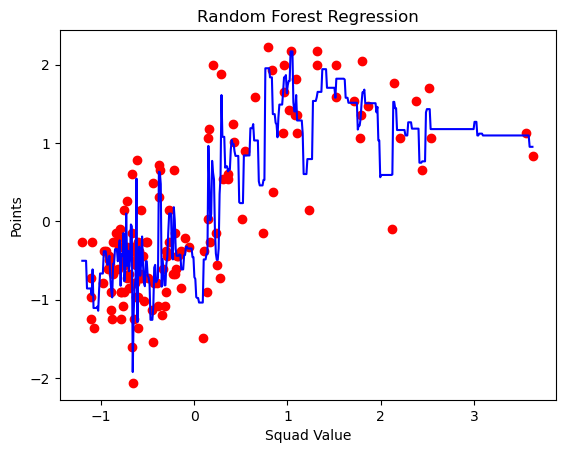

In [35]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Squad Value')
plt.ylabel('Points')
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-8.54808429371236

# Upon checking all the regression values we find that the R2 score of simple regression is the most ie that regression should be used in this case.

Since as a manager we needed to check how was a particular club preformance(total poinys) based on squad value so we had only one feature which was squad value and used label points 
ie it was theoritically better to use simple linear regression in this instance